# Modeling Survey data

This document records modeling step. 

In [47]:
from __future__ import division
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
from code.organize import *
from code.roughEDA import *
from code.survey_processor import *

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
survey = survey('data/survey')

In [49]:
survey.processor()

In [57]:
df = survey.fin_data

In [7]:
y = df.pop('employed').values
X = df.values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
pred = rf.predict(X_test)

In [19]:
rf.predict_proba(X_test)[:,1]

array([ 0.6,  1. ,  0.2, ...,  0.5,  1. ,  0. ])

In [14]:
pd.crosstab(pred, y_test)

col_0,False,True
row_0,,
False,403,98
True,138,848


In [15]:
from sklearn import metrics

In [39]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf.predict_proba(X_test)[:,1])

In [41]:
roc = pd.DataFrame({"fpr":fpr,"tpr": tpr})

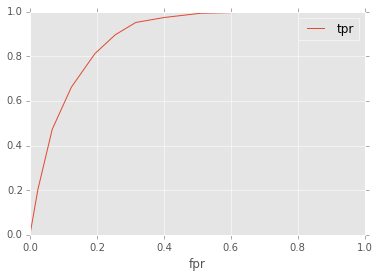

In [43]:
roc.plot(x = "fpr", y = 'tpr')

In [44]:
tpr

array([ 0.        ,  0.205074  ,  0.47251586,  0.66173362,  0.81183932,
        0.89640592,  0.95137421,  0.97357294,  0.99260042,  0.99788584,
        1.        ,  1.        ])

In [45]:
fpr

array([ 0.        ,  0.02402957,  0.06654344,  0.12384473,  0.19408503,
        0.25508318,  0.31608133,  0.40110906,  0.51016636,  0.67467652,
        0.85582255,  1.        ])

In [46]:
thresholds

array([ 2. ,  1. ,  0.9,  0.8,  0.7,  0.6,  0.5,  0.4,  0.3,  0.2,  0.1,
        0. ])